In [31]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 191 GB / percent used: 24.0 %


# Check model data

In [32]:
root_CM7 = '/thredds/tgcc/store/p86caub/ICOLMDZOR/PROD/highresSST-present/CM7A-HR-v1.11.highresSST-present'

folder_CM7 = 'ATM'
var_CM7_pr = 'precip'

path_CM7_pr = root_CM7+'/'+folder_CM7+'/Analyse/TS_MO/'+\
    'CM7A-HR-v1.11.highresSST-present_19500101_20141231_1M_'+var_CM7_pr+'.nc'

In [33]:
root_CM6 = '/bdd/CMIP6/HighResMIP/IPSL/IPSL-CM6A-ATM-HR/highresSST-present/r1i1p1f1'

var_CM6_pr = 'pr'
table_CM6 = 'Amon'

path_CM6_pr = root_CM6+'/'+table_CM6+'/'+var_CM6_pr+'/gr/latest/'\
    +var_CM6_pr+'_'+table_CM6+'_IPSL-CM6A-ATM-HR_highresSST-present_r1i1p1f1_gr_195001-201412.nc'

In [34]:
xr.open_dataset(path_CM7_pr)

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 360, lon: 720, presnivs: 79, time_counter: 780)
Coordinates:
  * lat                   (lat) float32 -90.0 -89.498604 ... 89.498604 90.0
  * lon                   (lon) float32 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * presnivs              (presnivs) float32 101202.11 100942.43 ... 1.4834349
  * time_counter          (time_counter) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
    time_centered         (time_counter) datetime64[ns] ...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    aire                  (time_counter, lat, lon) float32 ...
    precip                (time_counter, lat, lon) float32 ...
Attributes:
    name:         histmth
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2020-Jan-24 08:26:05 GMT
    uuid:         27ce6bdc-cbd2-4766-8ff0-99517e4a1700
    LongName:     IPSLCM6.1.11-LR

In [35]:
xr.open_dataset(path_CM6_pr)

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 361, lon: 512, time: 780)
Coordinates:
  * lat          (lat) float32 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon          (lon) float32 0.0 0.703125 1.40625 ... 358.59375 359.29688
  * time         (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    pr           (time, lat, lon) float32 ...
Attributes:
    name:                  /ccc/work/cont003/gencmip6/p86ghatt/IGCM_OUT/LMDZO...
    Conventions:           CF-1.7 CMIP-6.2
    creation_date:         2018-09-20T11:33:50Z
    tracking_id:           hdl:21.14100/42b314f0-1c12-4018-8b0d-f9c19101f2b4
    description:           Forced global atmosphere-land simulations using da...
    title:                 IPSL-CM6A-ATM-HR model output prepared for CMIP6 /...
    activity_id:           HighResMIP
    contact:               ipsl-cmip6@listes.ipsl.fr
    data_specs_version:    01.00.21
    dr2xml_version:        1.12
    experiment_id:         highresSST-present
    experiment:            forced atmosphere experiment for 1950-2014
    external_variables:    areacella
    forcing_index:         1
    frequency:             mon
    further_info_url:      https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM6...
    grid:                  LMDZ grid
    grid_label:            gr
    nominal_resolution:    50 km
    initialization_index:  1
    institution_id:        IPSL
    institution:           Institut Pierre Simon Laplace, Paris 75252, France
    license:               CMIP6 model data produced by IPSL is licensed unde...
    mip_era:               CMIP6
    physics_index:         1
    product:               model-output
    realization_index:     1
    realm:                 atmos
    source:                IPSL-CM6A-ATM-HR (2018):  atmos: LMDZ (NPv6, N256;...
    source_id:             IPSL-CM6A-ATM-HR
    source_type:           AGCM
    sub_experiment_id:     none
    sub_experiment:        none
    table_id:              Amon
    variable_id:           pr
    variant_label:         r1i1p1f1
    EXPID:                 highresSST-present
    CMIP6_CV_version:      cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:         523ab9c7b70cfe3bc2c825d1e555e1d0
    model_version:         6.1.5
    branch_method:         no parent
    parent_activity_id:    no parent
    parent_experiment_id:  no parent
    parent_mip_era:        no parent
    parent_source_id:      no parent
    parent_time_units:     no parent
    history:               Wed Oct 24 15:20:01 2018: ncatted -O -a parent_var...
    NCO:                   "4.6.0"
    parent_variant_label:  no parent

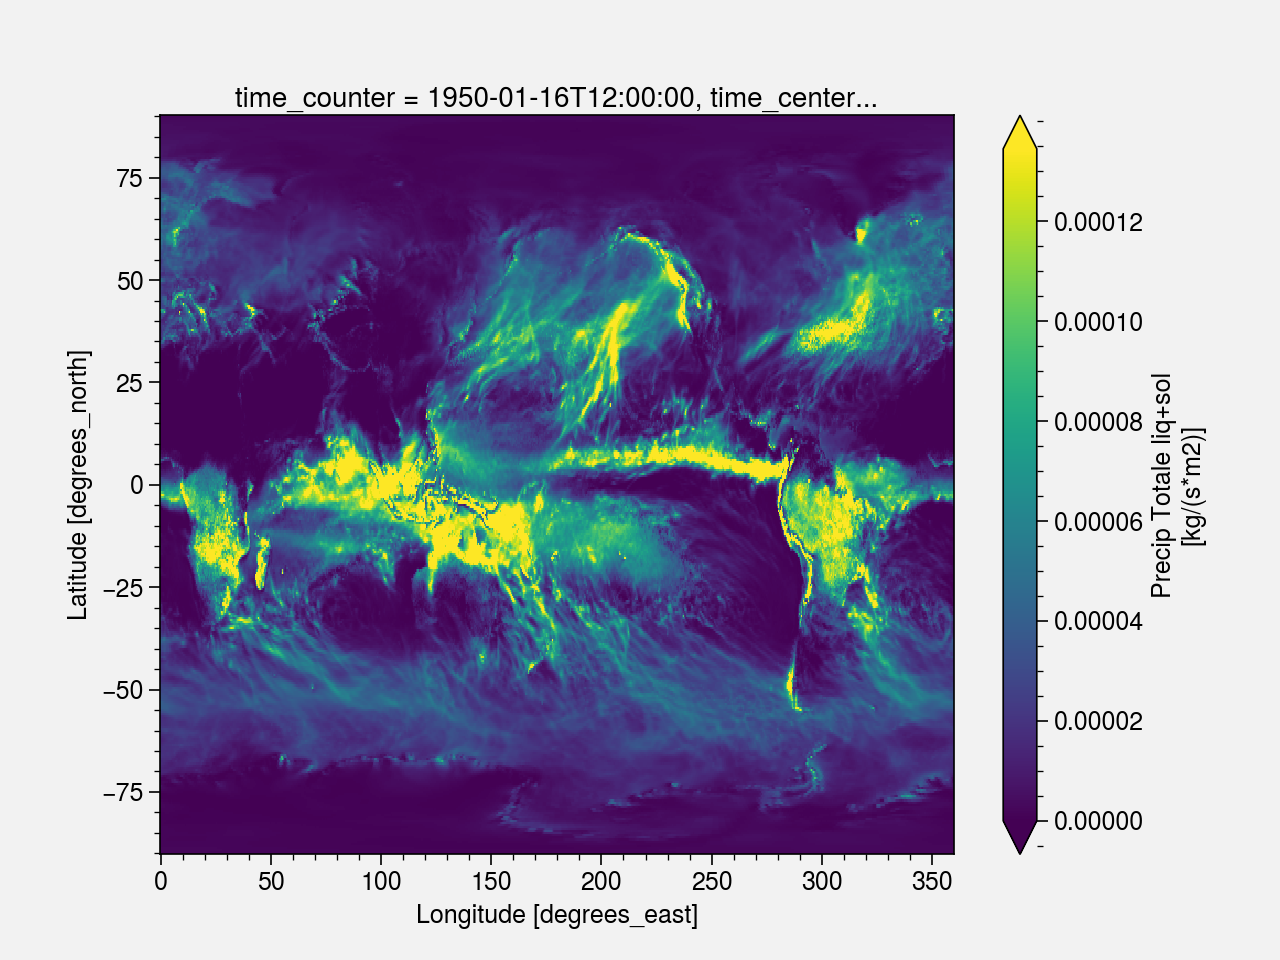

In [36]:
xr.open_dataset(path_CM7_pr)[var_CM7_pr].isel(time_counter=0).plot(robust=True)

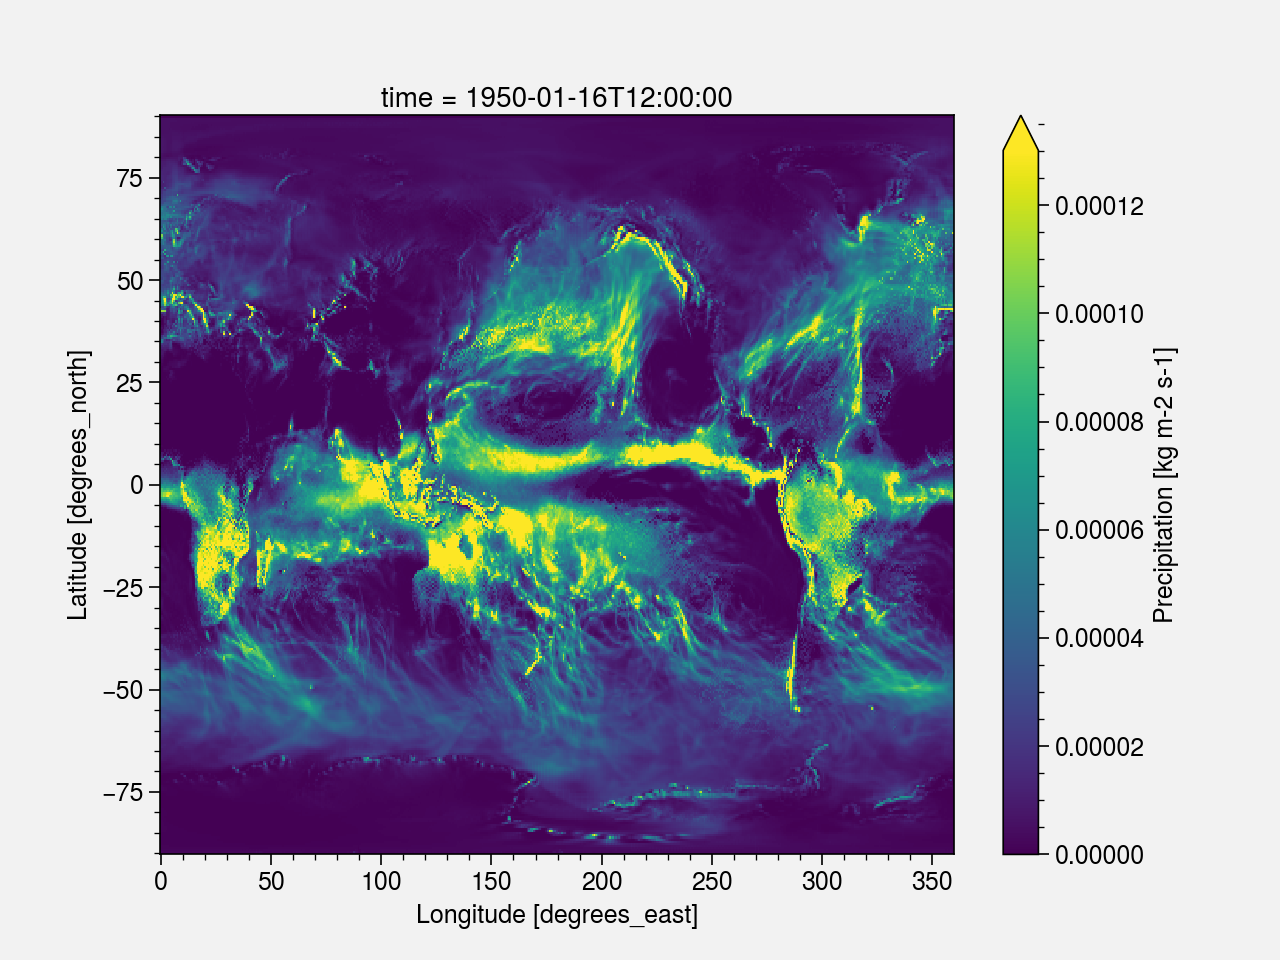

In [37]:
xr.open_dataset(path_CM6_pr)[var_CM6_pr].isel(time=0).plot(robust=True)

# Define period and zone

In [38]:
# Define common period
period = slice('1981','2014')

# Define zone
latlim=(10,50)
lonlim=(60,110)

# Get model data guided and not guided

In [39]:
model_CM7 = xr.open_dataset(path_CM7_pr)[var_CM7_pr].sel(time_counter=period)*86400
model_CM7 = model_CM7.rename({'time_counter': 'time'})
model_CM7.attrs['units'] = 'mm/day'
model_CM7

<xarray.DataArray 'precip' (time: 408, lat: 360, lon: 720)>
array([[[0.07512814, 0.07512814, 0.07512814, ..., 0.07512814,
         0.07512814, 0.07512814],
        [0.06299482, 0.06222472, 0.06222311, ..., 0.06385368,
         0.06382016, 0.06378765],
        [0.04942305, 0.04848652, 0.04848397, ..., 0.05066371,
         0.05054677, 0.0504352 ],
        ...,
        [0.24438054, 0.24438001, 0.24437836, ..., 0.24437563,
         0.24437836, 0.24438001],
        [0.23447907, 0.23447883, 0.23447816, ..., 0.234477  ,
         0.23447816, 0.23447883],
        [0.21565615, 0.21565615, 0.21565615, ..., 0.21565615,
         0.21565615, 0.21565615]],

       [[0.11674667, 0.11674667, 0.11674667, ..., 0.11674667,
         0.11674667, 0.11674667],
        [0.12382267, 0.12296539, 0.12292592, ..., 0.12464381,
         0.12464659, 0.1246493 ],
        [0.12169971, 0.11803879, 0.11785965, ..., 0.12592266,
         0.12566692, 0.12541418],
        ...,
        [0.33196277, 0.33195452, 0.33192981, ..., 0.33188863,
         0.33192981, 0.33195452],
        [0.29006776, 0.29006741, 0.29006637, ..., 0.29006464,
         0.29006637, 0.29006741],
        [0.23275307, 0.23275307, 0.23275307, ..., 0.23275307,
         0.23275307, 0.23275307]],

       [[0.30329175, 0.30329175, 0.30329175, ..., 0.30329175,
         0.30329175, 0.30329175],
        [0.33087573, 0.32662674, 0.32648425, ..., 0.33513577,
         0.33509306, 0.33505161],
        [0.34451123, 0.34000685, 0.33969469, ..., 0.34936573,
         0.34915702, 0.34894568],
        ...,
        [0.26088477, 0.26088872, 0.26090061, ..., 0.26092039,
         0.26090061, 0.26088872],
        [0.29872875, 0.29873028, 0.29873486, ..., 0.29874252,
         0.29873486, 0.29873028],
        [0.35510072, 0.35510072, 0.35510072, ..., 0.35510072,
         0.35510072, 0.35510072]],

       ...,

       [[0.1460771 , 0.1460771 , 0.1460771 , ..., 0.1460771 ,
         0.1460771 , 0.1460771 ],
        [0.15542611, 0.15338583, 0.15332376, ..., 0.15749447,
         0.15746719, 0.15744073],
        [0.16506907, 0.16316411, 0.16306357, ..., 0.16724064,
         0.16711888, 0.16699507],
        ...,
        [0.80982512, 0.80982834, 0.80983793, ..., 0.80985388,
         0.80983793, 0.80982834],
        [0.84757244, 0.84757315, 0.84757527, ..., 0.84757881,
         0.84757527, 0.84757315],
        [0.81354558, 0.81354558, 0.81354558, ..., 0.81354558,
         0.81354558, 0.81354558]],

       [[0.0812188 , 0.0812188 , 0.0812188 , ..., 0.0812188 ,
         0.0812188 , 0.0812188 ],
        [0.08638707, 0.08607589, 0.08606361, ..., 0.08669248,
         0.0866913 , 0.08669017],
        [0.08273172, 0.08305905, 0.08310628, ..., 0.08247051,
         0.08245761, 0.08244626],
        ...,
        [0.47705434, 0.47706047, 0.47707886, ..., 0.47710951,
         0.47707886, 0.47706047],
        [0.54103061, 0.54103261, 0.54103866, ..., 0.5410488 ,
         0.54103866, 0.54103261],
        [0.55684745, 0.55684745, 0.55684745, ..., 0.55684745,
         0.55684745, 0.55684745]],

       [[0.16361545, 0.16361545, 0.16361545, ..., 0.16361545,
         0.16361545, 0.16361545],
        [0.13380621, 0.13105044, 0.13100696, ..., 0.13674448,
         0.13666469, 0.13658729],
        [0.13908535, 0.13528711, 0.13503608, ..., 0.14322389,
         0.14303337, 0.14284199],
        ...,
        [0.38778138, 0.38778036, 0.38777733, ..., 0.38777226,
         0.38777733, 0.38778036],
        [0.3860642 , 0.38606428, 0.38606455, ..., 0.38606495,
         0.38606455, 0.38606428],
        [0.36570792, 0.36570792, 0.36570792, ..., 0.36570792,
         0.36570792, 0.36570792]]])
Coordinates:
  * lat            (lat) float32 -90.0 -89.498604 -88.997215 ... 89.498604 90.0
  * lon            (lon) float32 0.0 0.5 1.0 1.5 2.0 ... 358.0 358.5 359.0 359.5
  * time           (time) datetime64[ns] 1981-01-16T12:00:00 ... 2014-12-16T12:00:00
    time_centered  (time) datetime64[ns] ...
Attributes:
    units:    mm/day

In [40]:
model_CM6 = xr.open_dataset(path_CM6_pr)[var_CM6_pr].sel(time=period)*86400
model_CM6.attrs['units'] = 'mm/day'
model_CM6

<xarray.DataArray 'pr' (time: 408, lat: 361, lon: 512)>
array([[[0.08757322, 0.08757322, 0.08757322, ..., 0.08757322,
         0.08757322, 0.08757322],
        [0.2095456 , 0.14286726, 0.13574575, ..., 0.12879633,
         0.18175523, 0.1269301 ],
        [0.15139274, 0.11391232, 0.10847199, ..., 0.11285009,
         0.14392227, 0.11471356],
        ...,
        [0.54133805, 0.50445134, 0.53180115, ..., 0.51788504,
         0.51238422, 0.52260143],
        [0.53285173, 0.52270426, 0.53239537, ..., 0.51691693,
         0.51692243, 0.5214564 ],
        [0.27905685, 0.27905685, 0.27905685, ..., 0.27905685,
         0.27905685, 0.27905685]],

       [[0.17323822, 0.17323822, 0.17323822, ..., 0.17323822,
         0.17323822, 0.17323822],
        [0.4211317 , 0.33040999, 0.29845541, ..., 0.31276892,
         0.41674967, 0.30489442],
        [0.38629644, 0.29020033, 0.2942168 , ..., 0.30956964,
         0.387333  , 0.30793854],
        ...,
        [0.32935925, 0.33423158, 0.3379794 , ..., 0.32575783,
         0.32708537, 0.32650046],
        [0.32521396, 0.32721397, 0.32998675, ..., 0.32527018,
         0.32537751, 0.32584254],
        [0.17851307, 0.17851307, 0.17851307, ..., 0.17851307,
         0.17851307, 0.17851307]],

       [[0.11337194, 0.11337194, 0.11337194, ..., 0.11337194,
         0.11337194, 0.11337194],
        [0.31901967, 0.24971375, 0.23771308, ..., 0.23690396,
         0.299905  , 0.23214623],
        [0.29293763, 0.23206054, 0.22427466, ..., 0.25153809,
         0.2910563 , 0.2498027 ],
        ...,
        [0.98780205, 0.96393854, 0.98580792, ..., 0.92700507,
         0.93582218, 0.9436898 ],
        [0.87093957, 0.8632794 , 0.87385851, ..., 0.85608128,
         0.84894516, 0.86185183],
        [0.27404637, 0.27404637, 0.27404637, ..., 0.27404637,
         0.27404637, 0.27404637]],

       ...,

       [[0.08248839, 0.08248839, 0.08248839, ..., 0.08248839,
         0.08248839, 0.08248839],
        [0.27963789, 0.27307575, 0.2683391 , ..., 0.24632038,
         0.26626252, 0.2578666 ],
        [0.26818807, 0.22687933, 0.22333396, ..., 0.2258001 ,
         0.26368897, 0.23041487],
        ...,
        [0.46544009, 0.45375869, 0.46368323, ..., 0.45115422,
         0.45031326, 0.45403757],
        [0.47591587, 0.47937843, 0.4965141 , ..., 0.45853107,
         0.47019982, 0.46287806],
        [0.18681213, 0.18681213, 0.18681213, ..., 0.18681213,
         0.18681213, 0.18681213]],

       [[0.06090136, 0.06090136, 0.06090136, ..., 0.06090136,
         0.06090136, 0.06090136],
        [0.11290649, 0.08979112, 0.08707278, ..., 0.07967679,
         0.10100479, 0.08095267],
        [0.09146866, 0.0722935 , 0.06801743, ..., 0.0732801 ,
         0.08961606, 0.07484424],
        ...,
        [0.57071221, 0.57426125, 0.57356393, ..., 0.56353405,
         0.5654555 , 0.5632758 ],
        [0.52039855, 0.52273003, 0.52783422, ..., 0.51329984,
         0.51464553, 0.51623442],
        [0.22525923, 0.22525923, 0.22525923, ..., 0.22525923,
         0.22525923, 0.22525923]],

       [[0.04123817, 0.04123817, 0.04123817, ..., 0.04123817,
         0.04123817, 0.04123817],
        [0.11448216, 0.06880195, 0.06503468, ..., 0.05495284,
         0.09549344, 0.05758044],
        [0.06191307, 0.05058911, 0.03974331, ..., 0.04418416,
         0.05781684, 0.04764378],
        ...,
        [0.17956987, 0.18036304, 0.17775522, ..., 0.17508215,
         0.17182849, 0.17421138],
        [0.2004877 , 0.19631713, 0.20001752, ..., 0.20190724,
         0.19844829, 0.19552677],
        [0.12688455, 0.12688455, 0.12688455, ..., 0.12688455,
         0.12688455, 0.12688455]]])
Coordinates:
  * lat      (lat) float32 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float32 0.0 0.703125 1.40625 ... 358.59375 359.29688
  * time     (time) datetime64[ns] 1981-01-16T12:00:00 ... 2014-12-16T12:00:00
Attributes:
    units:    mm/day

# Compute climatologies

In [41]:
calendar = model_CM6.time.encoding['calendar']
calendar

'gregorian'

In [42]:
model_CM6_clim = u.clim(model_CM6, calendar=calendar)
model_CM7_clim = u.clim(model_CM7, calendar=calendar)

# Load obs
## APHRODITE http://aphrodite.st.hirosaki-u.ac.jp/download/data/search/  
http://aphrodite.st.hirosaki-u.ac.jp/download/
V1101 et V1101EX_R1 domain MA

http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/CMIP6_IPSL_bias/Precipitation.ipynb

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


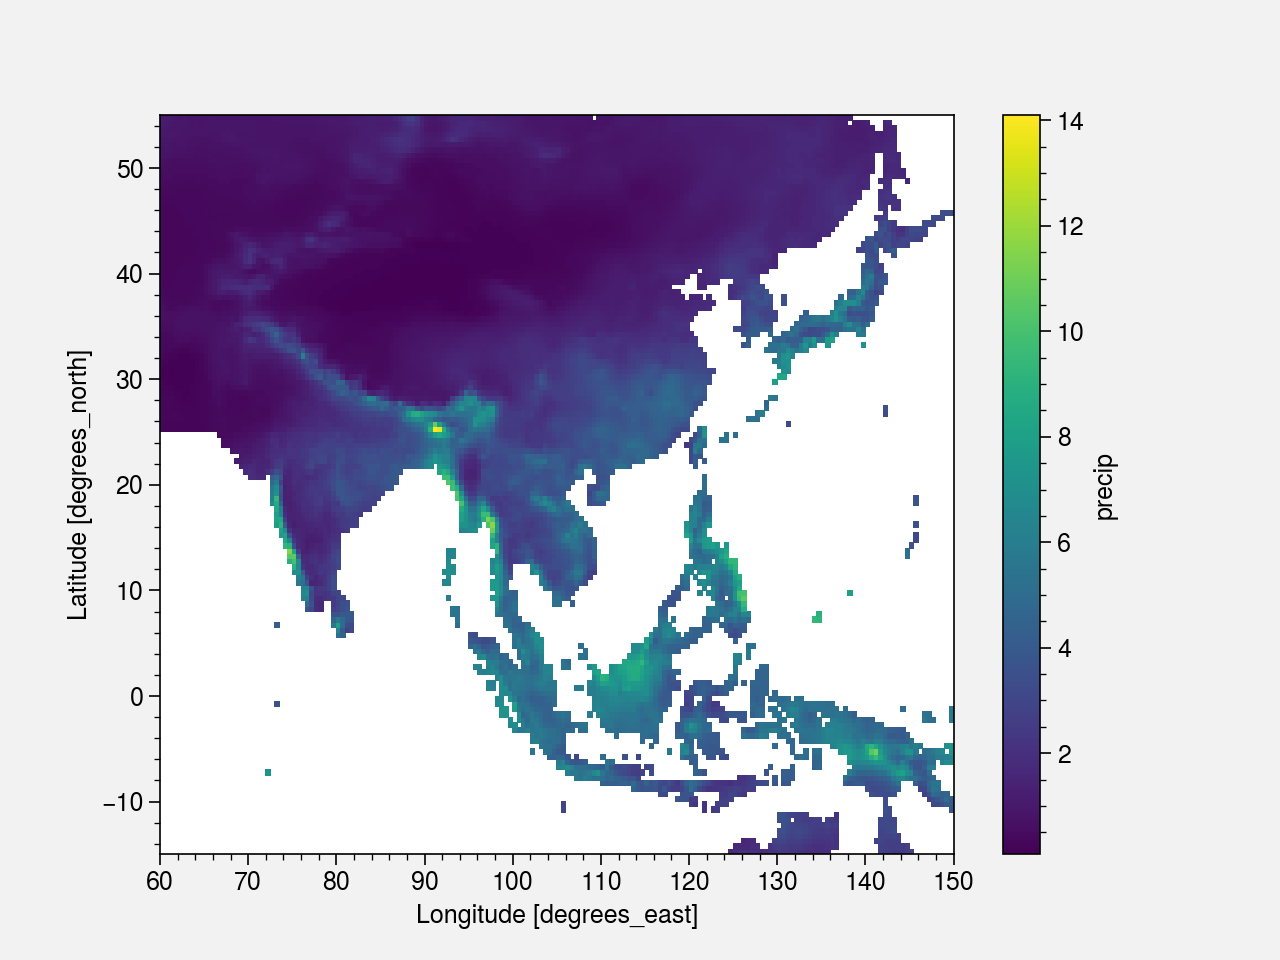

In [43]:
obs_longname = 'APHRODITE V1101 (0.5°)'
obs_name = 'APHRODITE'

obs_V1101 = xr.open_mfdataset(
    '/data/mlalande/APHRODITE/APHRO_MA_050deg_V1101.*.nc', combine='by_coords'
).precip
obs_V1101_EXR1 = xr.open_mfdataset(
    '/data/mlalande/APHRODITE/APHRO_MA_050deg_V1101_EXR1.*.nc', combine='by_coords'
).precip

obs_V1101 = obs_V1101.rename({'longitude': 'lon', 'latitude': 'lat'})
obs = xr.combine_nested([obs_V1101, obs_V1101_EXR1], concat_dim='time')
# Daily donc pas besoin de faire la clim en prenant en compte le nb de jours dans le mois
obs_clim = obs.sel(time=period).mean('time')
obs_clim.plot()

### Regrid using xESMF (https://xesmf.readthedocs.io/en/latest/) 

In [44]:
# For adding NaN values outside of the grid, otherwise it puts 0 (see issue just up #15)
import scipy
def add_matrix_NaNs(regridder):
    X = regridder.weights
    M = scipy.sparse.csr_matrix(X)
    num_nonzeros = np.diff(M.indptr)
    M[num_nonzeros == 0, 0] = np.NaN
    regridder.weights = scipy.sparse.coo_matrix(M)
    return regridder

# Make the regrider
regridder = xe.Regridder(obs_clim, model_CM6_clim, 'bilinear', periodic=False, reuse_weights=True)
regridder = add_matrix_NaNs(regridder)
print(regridder)

# Regrid the data
obs_clim_regrid = regridder(obs_clim)

Reuse existing file: bilinear_140x180_361x512.nc


/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_140x180_361x512.nc 
Reuse pre-computed weights? True 
Input grid shape:           (140, 180) 
Output grid shape:          (361, 512) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False


In [45]:
regridder = xe.Regridder(model_CM7_clim, model_CM6_clim, 'bilinear', periodic=True, reuse_weights=True)
model_CM7_clim_regrid = regridder(model_CM7_clim)

Reuse existing file: bilinear_360x720_361x512_peri.nc


# Plot differences

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


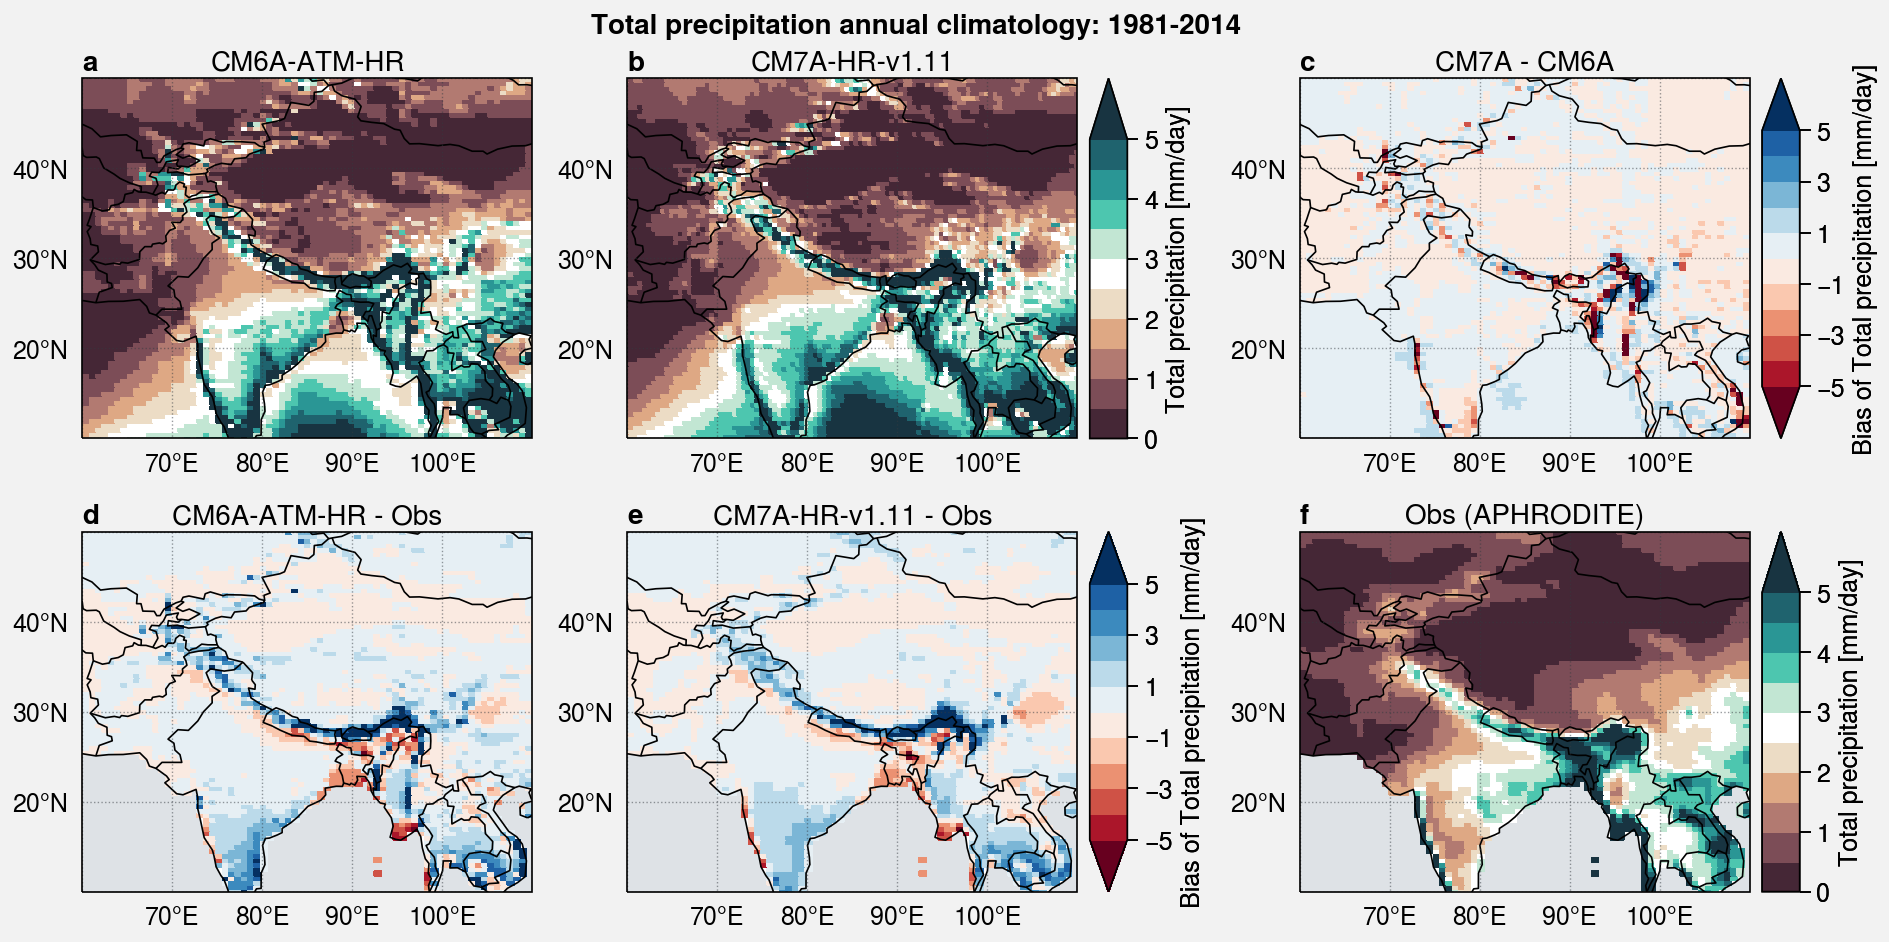

In [50]:
var = 'pr'
label = 'Total precipitation'
units = 'mm/day'
cmap='DryWet'
levels=plot.arange(0,5,0.5)

levels_diff = plot.arange(-5,5,1)
cmap_dif = 'BuRd_r'
extend_diff = 'both'
extend='max'

f, axs = plot.subplots(proj='cyl', ncols=3, nrows=2)

titles = ['CM6A-ATM-HR', 'CM7A-HR-v1.11', 'CM7A - CM6A']

# First row: differences guided / not guide
axs[0].pcolormesh(model_CM6_clim, cmap=cmap, levels=levels, extend=extend)
axs[0].format(title=titles[0])

m1 = axs[1].pcolormesh(model_CM7_clim, cmap=cmap, levels=levels, extend=extend)
axs[1].format(title=titles[1])
axs[1].colorbar(m1, label=label+ ' ['+units+']')

m2 = axs[2].pcolormesh(model_CM7_clim_regrid - model_CM6_clim, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[2].format(title=titles[2])
axs[2].colorbar(m2, label='Bias of '+label+ ' ['+units+']')


# Second row: differences with obs

axs[3].pcolormesh(model_CM6_clim - obs_clim_regrid, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[3].format(title=titles[0]+' - Obs')

axs[4].pcolormesh(model_CM7_clim_regrid - obs_clim_regrid, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[4].format(title=titles[1]+' - Obs')
axs[4].colorbar(m2, label='Bias of '+label+ ' ['+units+']')

axs[5].pcolormesh(obs_clim_regrid, cmap=cmap, levels=levels, extend=extend)
axs[5].format(title='Obs ('+obs_name+')')
axs[5].colorbar(m1, label=label+ ' ['+units+']')


axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle=label+" annual climatology: "+period.start+"-"+period.stop,
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

# f.save('img/'+var+'_dynamico_'+period.start+'-'+period.stop+'.png')
# f.save('img/'+var+'_dynamico_'+period.start+'-'+period.stop+'.pdf')

/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


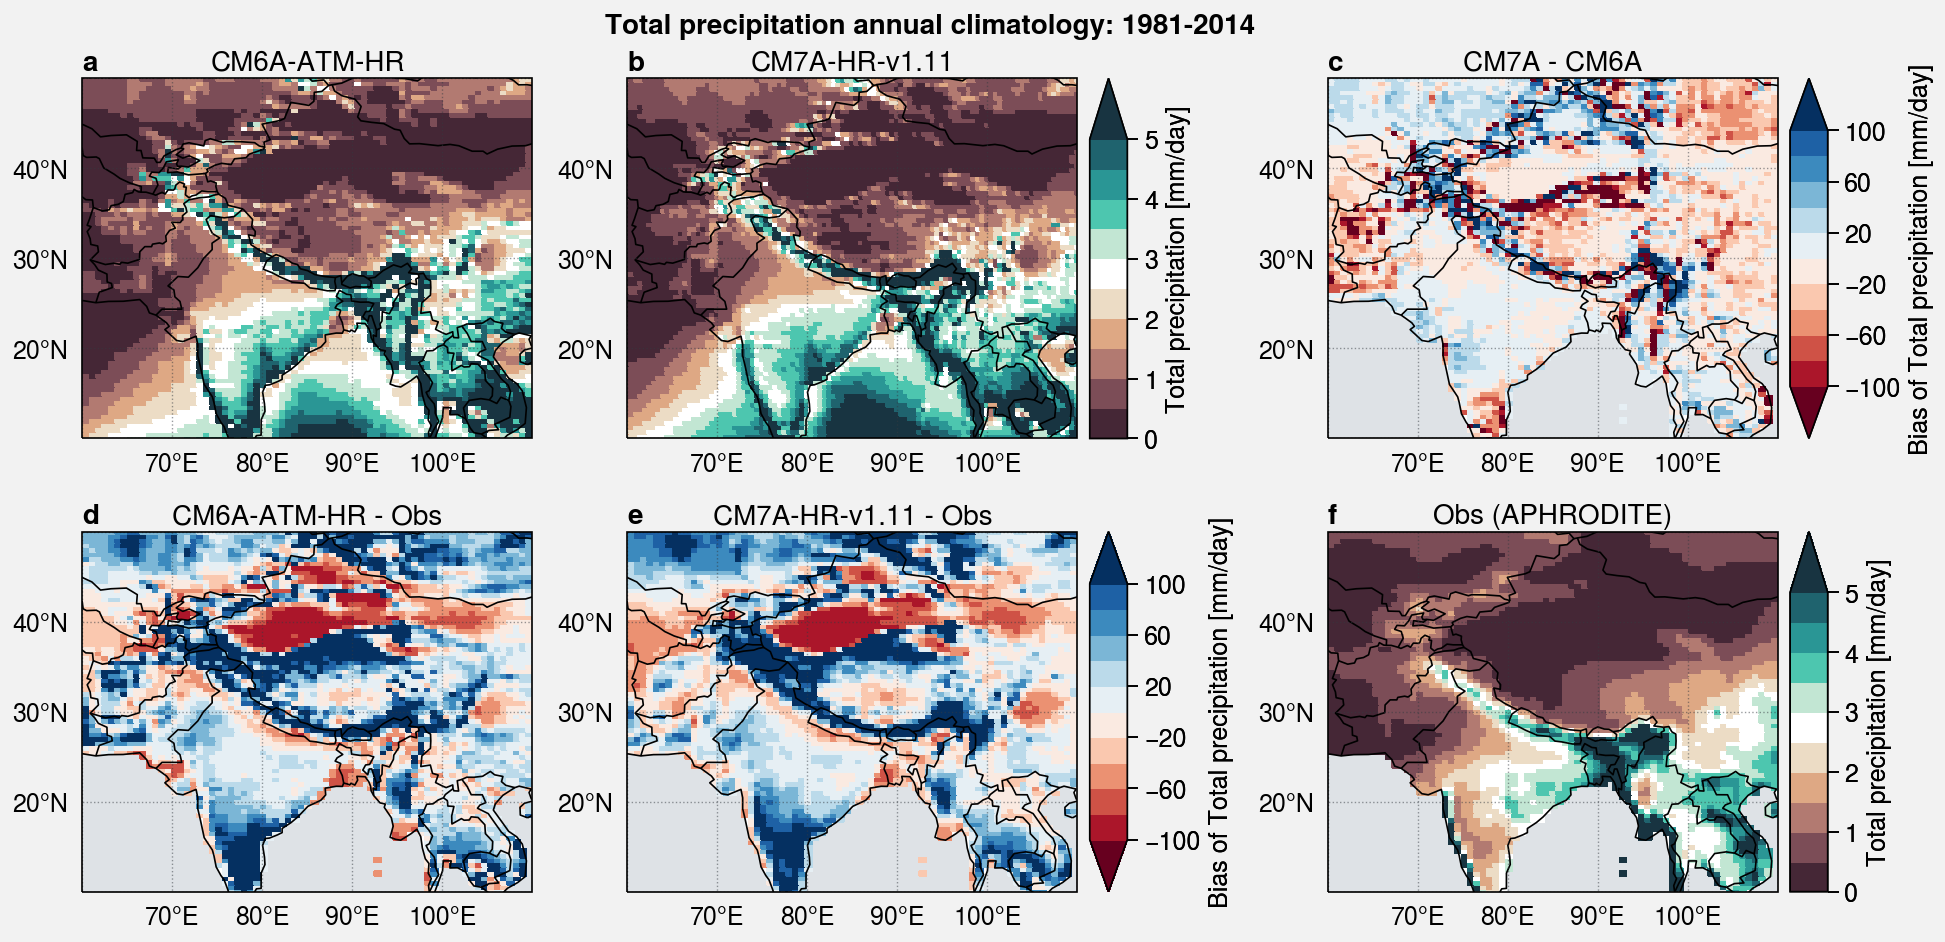

In [49]:
var = 'pr'
label = 'Total precipitation'
units = 'mm/day'
cmap='DryWet'
levels=plot.arange(0,5,0.5)

levels_diff = plot.arange(-100,100,20)
cmap_dif = 'BuRd_r'
extend_diff = 'both'
extend='max'

f, axs = plot.subplots(proj='cyl', ncols=3, nrows=2)

titles = ['CM6A-ATM-HR', 'CM7A-HR-v1.11', 'CM7A - CM6A']

# First row: differences guided / not guide
axs[0].pcolormesh(model_CM6_clim, cmap=cmap, levels=levels, extend=extend)
axs[0].format(title=titles[0])

m1 = axs[1].pcolormesh(model_CM7_clim, cmap=cmap, levels=levels, extend=extend)
axs[1].format(title=titles[1])
axs[1].colorbar(m1, label=label+ ' ['+units+']')

m2 = axs[2].pcolormesh((model_CM7_clim_regrid - model_CM6_clim)/obs_clim_regrid*100, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[2].format(title=titles[2])
axs[2].colorbar(m2, label='Bias of '+label+ ' ['+units+']')


# Second row: differences with obs

axs[3].pcolormesh((model_CM6_clim - obs_clim_regrid)/obs_clim_regrid*100, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[3].format(title=titles[0]+' - Obs')

axs[4].pcolormesh((model_CM7_clim_regrid - obs_clim_regrid)/obs_clim_regrid*100, cmap=cmap_dif, levels=levels_diff, extend=extend_diff)
axs[4].format(title=titles[1]+' - Obs')
axs[4].colorbar(m2, label='Bias of '+label+ ' ['+units+']')

axs[5].pcolormesh(obs_clim_regrid, cmap=cmap, levels=levels, extend=extend)
axs[5].format(title='Obs ('+obs_name+')')
axs[5].colorbar(m1, label=label+ ' ['+units+']')


axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle=label+" annual climatology: "+period.start+"-"+period.stop,
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

# f.save('img/'+var+'_relative_dynamico_'+period.start+'-'+period.stop+'.png')
# f.save('img/'+var+'_relative_dynamico_'+period.start+'-'+period.stop+'.pdf')